<a href="https://colab.research.google.com/github/nishLauw/Latihan1/blob/master/Anisah_Raharjo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework Trial Class - Mini Case

## --- Anisah Raharjo ---

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

## Section 1

### Create New Feature: Year

In [ ]:
# mengubah tipe data kolom InvoiceDate menjadi datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# membuat kolom baru Year berisi nilai tahun dari kolom InvoiceDate
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year

df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009


### Filtering Data

In [ ]:
# buat filtering data
sales = df[
    (df['Quantity'] > 0)
    & 
    (~df["Invoice"].str.contains('C'))
]
print(sales)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Revenue  Year  
0     

### Create New Feature: Revenue

In [ ]:
# Buat kolom baru bernama Revenue (Quantity * Price)
df['Revenue'] = df['Quantity'] * df['Price']

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009


### Average of Revenue per Year

In [ ]:
# Menghitung rata-rata Revenue per tahun
revenue_by_year = sales.groupby('Year')['Revenue'].mean()

print(revenue_by_year)

Year
2009    18.713273
2010    19.908987
2011    20.058767
Name: Revenue, dtype: float64


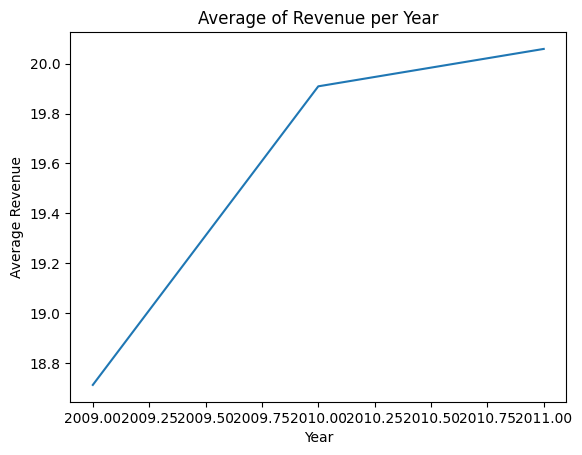

In [ ]:
## Membuat visualisasi dari Revenue per tahun


# Line Plot
plt.plot(revenue_by_year.index, revenue_by_year.values)

# tambahkan judul dan label pada sumbu x dan y
plt.title('Average of Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')

# tampilkan plot
plt.show()

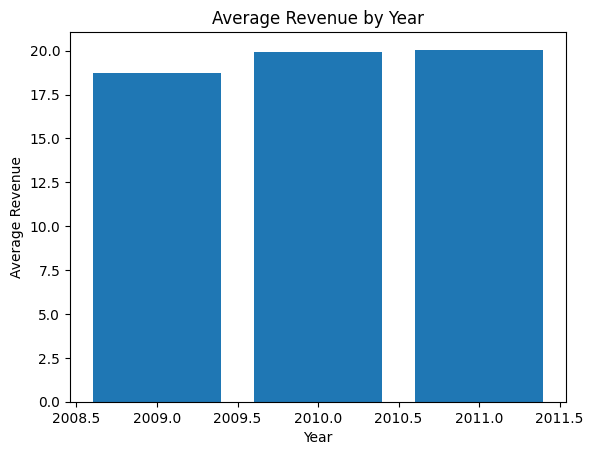

In [ ]:
# Bar Plot
plt.bar(revenue_by_year.index, revenue_by_year.values)

# atur judul dan label sumbu
plt.title('Average Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')

# tampilkan plot
plt.show()

### Interpretation

Output tersebut merupakan rata-rata pendapatan per tahun dari data penjualan yang dikelompokkan berdasarkan tahun. Pada tahun 2009, rata-rata pendapatannya sebesar 18.713273, pada tahun 2010 sebesar 19.908987, dan pada tahun 2011 sebesar 20.058767. Output tersebut bisa menjadi informasi yang penting bagi perusahaan untuk mengetahui performa penjualan mereka dari tahun ke tahun dan memperhitungkan proyeksi pendapatan di masa depan.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [ ]:
# buat filtering data
finish = sales[ 
    sales['Customer ID'].notnull()
]

print(finish)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Revenue  Year  
0     

#### Customers who canceled their purchases

In [ ]:
cancel = df[
    df['Invoice'].str.contains('C')
  ]

print(cancel)

         Invoice StockCode                       Description  Quantity  \
178      C489449     22087          PAPER BUNTING WHITE LACE       -12   
179      C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180      C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181      C489449     21896                POTTING SHED TWINE        -6   
182      C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...          ...       ...                               ...       ...   
1065910  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
1067002  C581499         M                            Manual        -1   
1067176  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
1067177  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
1067178  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate   Price  Customer ID         Country  Revenue  \
178     2009-12-01 10:33:00    2.9

### Number of Finished and Canceled Transactions Each Year

In [ ]:
# Hitung jumlah transaksi per tahun
finished = sales.groupby('Year')['Invoice'].count()
canceled = cancel.groupby('Year')['Invoice'].count()

# Gabungkan hasil perhitungan dalam satu dataframe
transaction_count = pd.concat([finished, canceled], axis=1, keys=['Finished', 'Canceled'])

print(transaction_count)


      Finished  Canceled
Year                    
2009     44123      1015
2010    510694      9919
2011    489603      8560


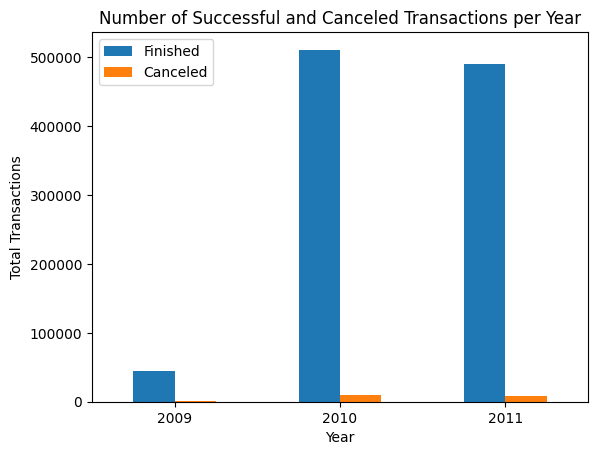

In [ ]:
transaction_count.plot.bar(rot=0)
plt.title('Number of Successful and Canceled Transactions per Year')
plt.xlabel('Year')
plt.ylabel('Total Transactions')
plt.legend()

plt.show()

### Cancellation Rate

In [ ]:
# Hitung jumlah customer yang cancel per tahun
canceled_customers = cancel.groupby('Year')['Invoice'].nunique()

# Hitung jumlah seluruh customer per tahun
total_customers = df.groupby('Year')['Invoice'].nunique()

# Hitung cancellation rate per tahun
cancellation_rate = (canceled_customers / total_customers) * 100

print(cancellation_rate)

Year
2009    17.210300
2010    15.975641
2011    14.701571
Name: Invoice, dtype: float64


### Interpretation

In [ ]:
# Gabungan hasil perhitungan dalam satu dataframe

result = pd.concat([finished, canceled, cancellation_rate], axis=1, keys=['Finished', 'Canceled', 'cancellation_rate'])
print(result)

      Finished  Canceled  cancellation_rate
Year                                       
2009     44123      1015          17.210300
2010    510694      9919          15.975641
2011    489603      8560          14.701571



Perbandingan antara output jumlah transaksi yang berhasil dan transaksi yang dibatalkan dengan output cancellation rate menunjukkan bahwa pada tahun 2009 hingga 2011, jumlah transaksi yang berhasil terus meningkat sementara jumlah transaksi yang dibatalkan juga meningkat. Meskipun demikian, cancellation rate menunjukkan bahwa proporsi pelanggan yang membatalkan transaksi mengalami penurunan seiring dengan meningkatnya jumlah transaksi yang berhasil. Oleh karena itu, meskipun jumlah transaksi yang dibatalkan meningkat, hal ini dapat dianggap normal karena tetap berada dalam kisaran yang dapat diterima dan masih dalam batas yang dapat ditoleransi oleh perusahaan.